# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg
np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    M,N = A.shape 
    U,s,Vh = svd(A)
    B=np.zeros((M,N))
    for l in range(0, min(M,N)):
        B=B + s[l] * (U[: , l:(l+1)] @ Vh[l:(l+1) , :])
    return np.allclose(A,B)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

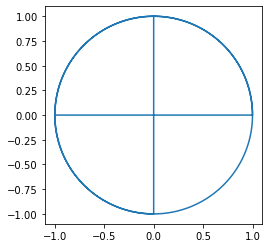

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


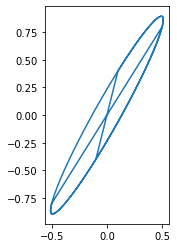

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)
Sig= linalg.diagsvd(s,2,2)
u

array([[-0.48835631, -0.87264432],
       [-0.87264432,  0.48835631]])

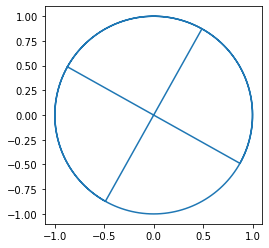

In [11]:
show_circle(u @ circle)

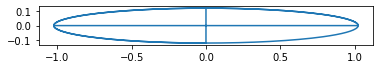

In [12]:
show_circle(Sig @ circle)

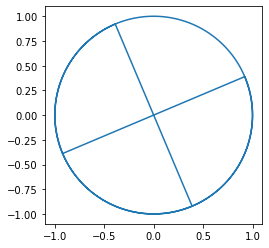

In [13]:
show_circle(vh @ circle)

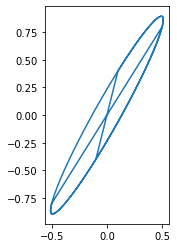

In [14]:
show_circle(u @ Sig @ vh @ circle)

__Respuesta:__ La aplicacion de vh al circulo es una rotacion, luego Sig "achata" el circulo y u rota el circulo achatado. Creo que no influye el hecho de que u y vh sean unitarias.

__Respuesta:__ Aplicarle A al circulo, es equivalente a aplicar vh, Sig y u, en ese orden, al circulo.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [15]:
from pathlib import Path
from PIL import Image

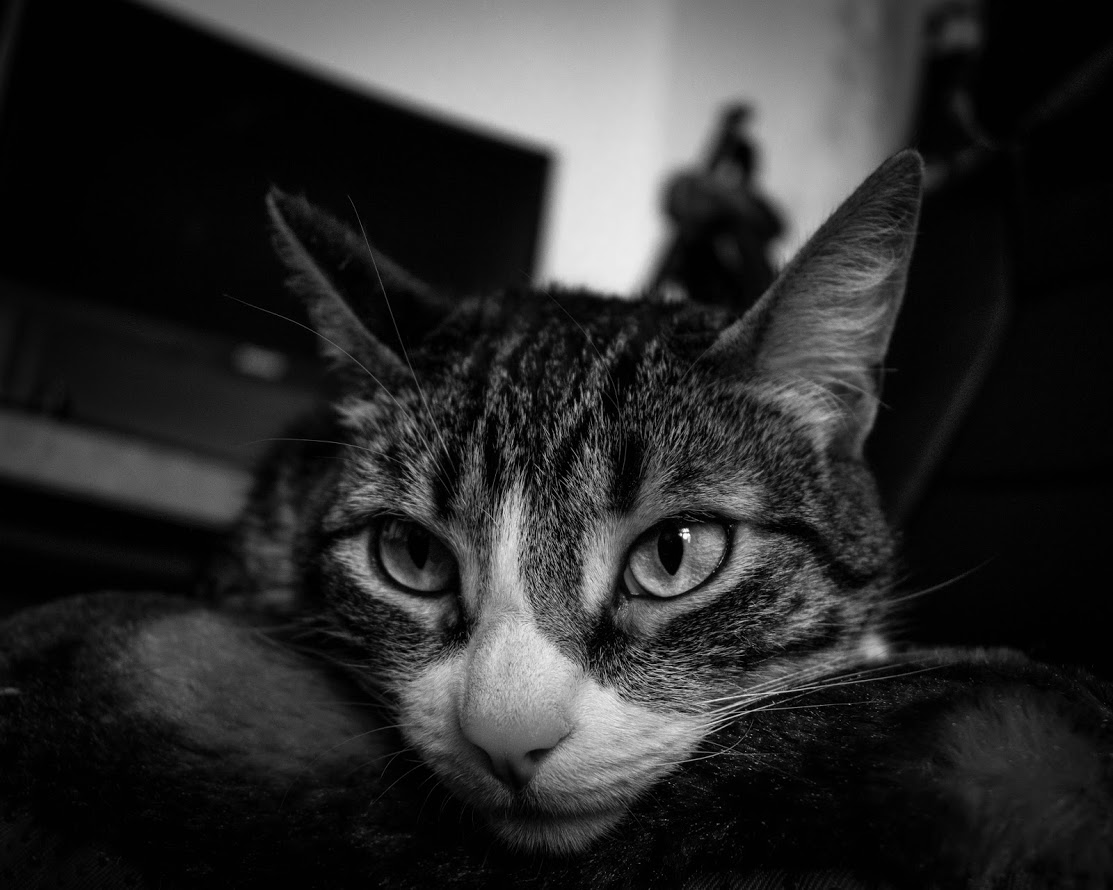

In [16]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [17]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [18]:
def low_rank_svd_approximation(A, l):
    M,N = A.shape 
    U,s,Vh = svd(A)
    B=np.zeros((M,N))
    for i in range(0, l):
        B=B + s[i] * (U[: , i:(i+1)] @ Vh[i:(i+1) , :])   
    E=A-B
    F=(E*E)
    cont=0
    for i in range(0,M):
        for j in range(0,N):
            cont=cont + F[i,j]**2
    error=cont**(1/2)
    print(error)
    return B

746892.9779693255


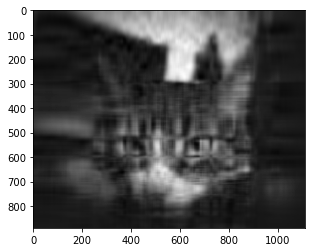

In [19]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

262036.43062324103


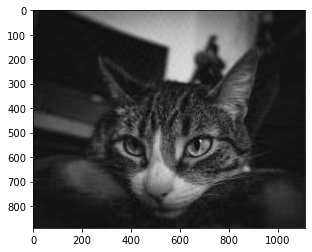

In [20]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [21]:
def low_rank_svd_tol_approximation(A, tol):
    U,s,Vh = svd(A)
    n=len(s)
    d=0
    for i in range(0,n):
        d=d + (s[i]*s[i])
    cont=0
    for j in range(0,n-1):
        cont=cont + (s[n-1-j]*s[n-1-j])
        E=(cont/d)**(1/2)
        if E <= tol:
            l=n-j
            break
    return low_rank_svd_approximation(A,l)
        
        
        

0.0025287246764418496


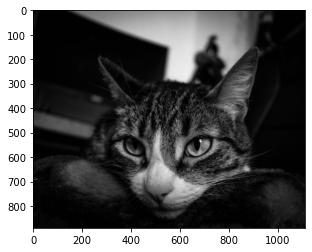

In [22]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

0.0025287246764418496


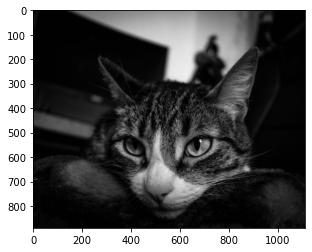

In [23]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

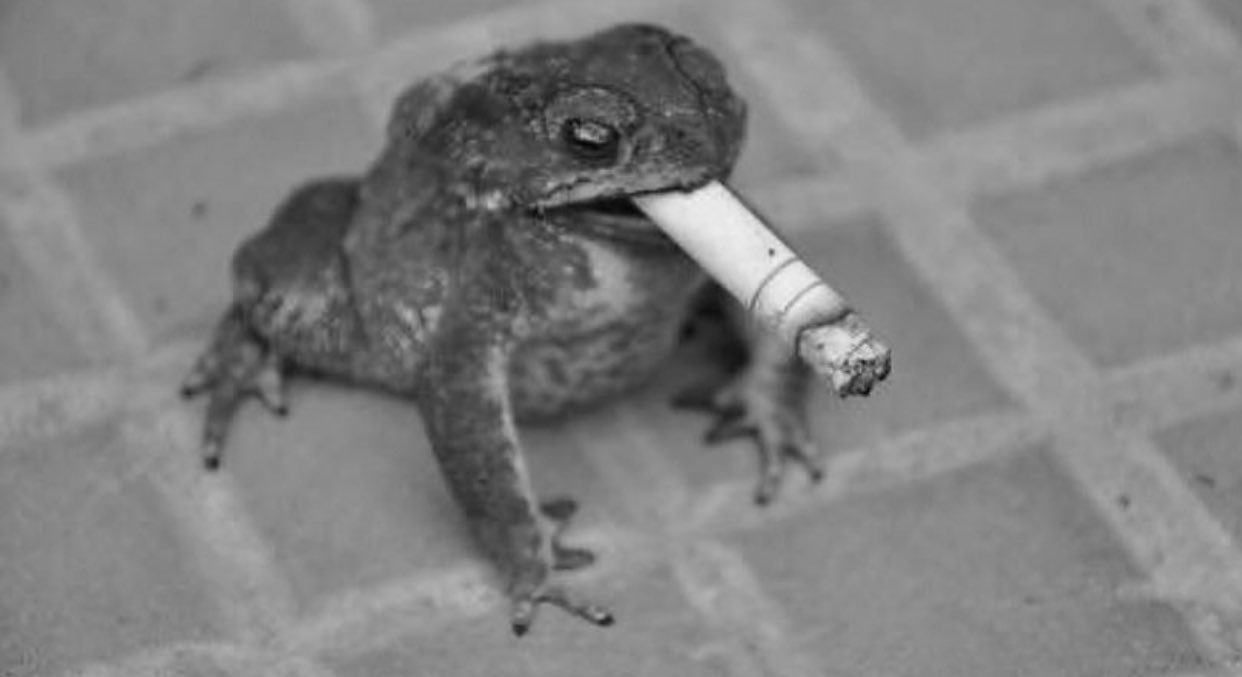

In [24]:
your_img_name = "oscar.png"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [25]:
your_img_np = np.array(your_img)

233135.79276623786


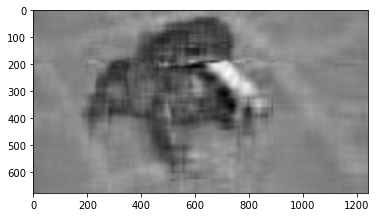

In [26]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

99907.73530406169


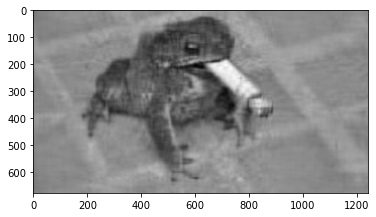

In [27]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

0.003395980430538923


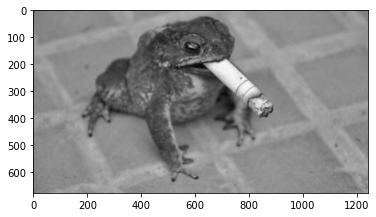

In [28]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

0.003395980430538923


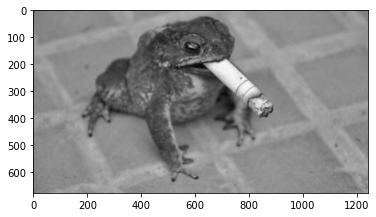

In [29]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__No es una manera eficiente, ya que, se demora en comprimir imagenes de buena calidad, incluso para valores bajos de l. Yo creo que existen maneras mas eficientes.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [30]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [31]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [32]:
start_date = "2020-10-01"
end_date = "2020-10-11"

In [33]:

df_aux = covid_comunas.loc[lambda x: x["codigo_comuna"].notnull()].fillna(0).melt(id_vars=["region","codigo_region","comuna","codigo_comuna","poblacion","tasa"], value_vars=covid_comunas.columns[5:-2], var_name="fecha", value_name="casos_totales")  

df_aux["casos_nuevos"]=df_aux.groupby("comuna")["casos_totales"].diff()

df_aux["fecha"]=pd.to_datetime(df_aux["fecha"])

df_aux = df_aux.loc[lambda x: x["fecha"] >= start_date] 

df_aux = df_aux.loc[lambda x: x["fecha"] <= end_date] 

df_aux = df_aux.groupby(["region","comuna","poblacion"]).agg(promedio_casos_nuevos=("casos_nuevos","mean"))

df_aux=df_aux.reset_index()

df_aux["tasa_promedio_casos_nuevos"]=(df_aux["promedio_casos_nuevos"]*100000)/df_aux["poblacion"]

df_aux.sort_values(by="tasa_promedio_casos_nuevos",ascending=False)

covid_tasa_promedio_nuevos=df_aux

In [34]:
covid_tasa_promedio_nuevos

,region,comuna,poblacion,promedio_casos_nuevos,tasa_promedio_casos_nuevos
0,Antofagasta,Antofagasta,425725.0,132.000000,31.005931
1,Antofagasta,Calama,190336.0,38.000000,19.964694
2,Antofagasta,Maria Elena,6814.0,0.000000,0.000000
3,Antofagasta,Mejillones,14776.0,4.666667,31.582747
4,Antofagasta,Ollague,287.0,0.000000,0.000000
...,...,...,...,...,...
341,Ñuble,San Fabian,4654.0,0.333333,7.162298
342,Ñuble,San Ignacio,16624.0,1.666667,10.025666
343,Ñuble,San Nicolas,12172.0,0.666667,5.477051
344,Ñuble,Treguaco,5696.0,4.000000,70.224719


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [35]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [36]:
covid_pcr_melt = covid_pcr.melt(id_vars=["region"], value_vars=covid_pcr.columns[3:], var_name="fecha", value_name="nm_pcr")

covid_pcr_melt["fecha"]=pd.to_datetime(covid_pcr_melt["fecha"])

covid_pcr_melt=covid_pcr_melt.fillna(0)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3307,Araucanía,2020-11-01,1878.0
3308,Los Ríos,2020-11-01,836.0
3309,Los Lagos,2020-11-01,5232.0
3310,Aysén,2020-11-01,333.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [37]:
covid_casos_melt = covid_comunas.melt(id_vars=["region"], value_vars=covid_comunas.columns[5:-1], var_name="fecha", value_name="casos_totales")

covid_casos_melt=covid_casos_melt.fillna(0)

covid_casos_melt["fecha"]=pd.to_datetime(covid_casos_melt["fecha"])

covid_casos_melt=covid_casos_melt.groupby(["region","fecha"]).agg(casos_totales=("casos_totales","sum"))

covis_casos_melt=covid_casos_melt.reset_index()

covid_casos_melt

casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [38]:
covid_corr_casos_pcr = pd.merge(covid_casos_melt,  covid_pcr_melt, how="outer" ,on=["region","fecha"])

covid_corr_casos_pcr["nm_pcr"] = covid_corr_casos_pcr["nm_pcr"].fillna(0)

covid_corr_casos_pcr["casos_totales"] = covid_corr_casos_pcr["casos_totales"].ffill()

covid_corr_casos_pcr = covid_corr_casos_pcr.groupby("region").corr()

covid_corr_casos_pcr

casos_totales    nm_pcr
region                                                   
Antofagasta        casos_totales       1.000000  0.450230
                   nm_pcr              0.450230  1.000000
Araucanía          casos_totales       1.000000  0.302600
                   nm_pcr              0.302600  1.000000
Arica y Parinacota casos_totales       1.000000  0.326114
                   nm_pcr              0.326114  1.000000
Atacama            casos_totales       1.000000  0.207066
                   nm_pcr              0.207066  1.000000
Aysén              casos_totales       1.000000  0.095216
                   nm_pcr              0.095216  1.000000
Biobío             casos_totales       1.000000  0.554945
                   nm_pcr              0.554945  1.000000
Coquimbo           casos_totales       1.000000  0.484513
                   nm_pcr              0.484513  1.000000
Los Lagos          casos_totales       1.000000  0.371543
                   nm_pcr              0.371543  1.000000
Los Ríos           casos_totales       1.000000  0.076982
                   nm_pcr              0.076982  1.000000
Magallanes         casos_totales       1.000000  0.253382
                   nm_pcr              0.253382  1.000000
Maule              casos_totales       1.000000  0.554400
                   nm_pcr              0.554400  1.000000
Metropolitana      casos_totales       1.000000  0.333475
                   nm_pcr              0.333475  1.000000
O’Higgins          casos_totales       1.000000  0.539134
                   nm_pcr              0.539134  1.000000
Tarapacá           casos_totales       1.000000  0.451899
                   nm_pcr              0.451899  1.000000
Valparaíso         casos_totales       1.000000  0.474054
                   nm_pcr              0.474054  1.000000
Ñuble              casos_totales       1.000000  0.234835
                   nm_pcr              0.234835  1.000000

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Podemos ver que existe una relacion entre los casos y el numero de pcr, pero esta no esta tan cerca de ser lineal. En las regiones donde esta mas cerca de ser lineal es en las regiones mas pobladas, como en las regiones Metropolitana, Valparaiso y del Biobio. Tiene sentido en mi opinion, porque mientras mas grande sea la poblacion habran mas contagiados, y aumentara la demanda de los pcr, y esta demanda sera muchoi mas grande que en las regiones donde hay menos poblacion, por lo tanto llegaran mas pcr a las regiones pobladas. 

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [39]:
# FIX ME PLEASE #

__Respuesta:__